In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import pybaseball as pyb

In [8]:
stadium = pd.read_csv('https://raw.githubusercontent.com/jldbc/pybaseball/master/pybaseball/data/mlbstadiums.csv')

stadium['y'] = stadium['y'] * -1
stadium = stadium.loc[:,'team':]

stadium.head()

,team,x,y,segment,name,location
0,angels,147.568126,-179.161874,infield_inner,Angel Stadium of Anaheim,"Anaheim, CA"
1,angels,144.993615,-181.736385,infield_inner,Angel Stadium of Anaheim,"Anaheim, CA"
2,angels,142.419105,-184.310895,infield_inner,Angel Stadium of Anaheim,"Anaheim, CA"
3,angels,139.844595,-186.885405,infield_inner,Angel Stadium of Anaheim,"Anaheim, CA"
4,angels,137.270085,-189.459915,infield_inner,Angel Stadium of Anaheim,"Anaheim, CA"


In [9]:
def plot_stadium(team, color):

    team_df = stadium[stadium['team'] == team.lower()]
    for i in stadium['segment'].unique():
        data = team_df[team_df['segment'] == i]
        plt.plot(data['x'],data['y'], linestyle = '-', color = color)
    plt.suptitle(team.capitalize(), y=1.01, fontsize=15)
    plt.title(team_df['location'].any(), fontsize=10)
    plt.axis('off');

In [10]:
pyb.playerid_lookup('trout', 'mike')

Gathering player lookup table. This may take a moment.


,name_last,name_first,key_mlbam,key_retro,key_bbref,key_fangraphs,mlb_played_first,mlb_played_last
0,trout,mike,545361,troum001,troutmi01,10155,2011.0,2021.0


In [18]:
start_date = '2019-03-23'
end_date = '2019-11-23'

trout_df = pyb.statcast_batter(start_date, end_date, 545361)

home_trout_df = trout_df.loc[trout_df['home_team'] == 'LAA']

HR_LAA = home_trout_df[home_trout_df['events'] == 'home_run']

Gathering Player Data


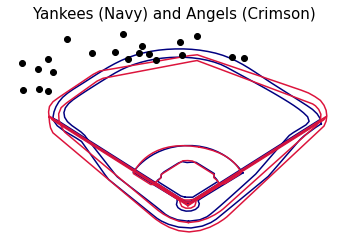

In [19]:
plot_stadium('yankees','navy')
plot_stadium('angels','crimson')

plt.plot(HR_LAA['hc_x'],HR_LAA['hc_y']*-1, 'o',color= 'black')

plt.suptitle(None)
plt.title('Yankees (Navy) and Angels (Crimson)',fontsize = 15);